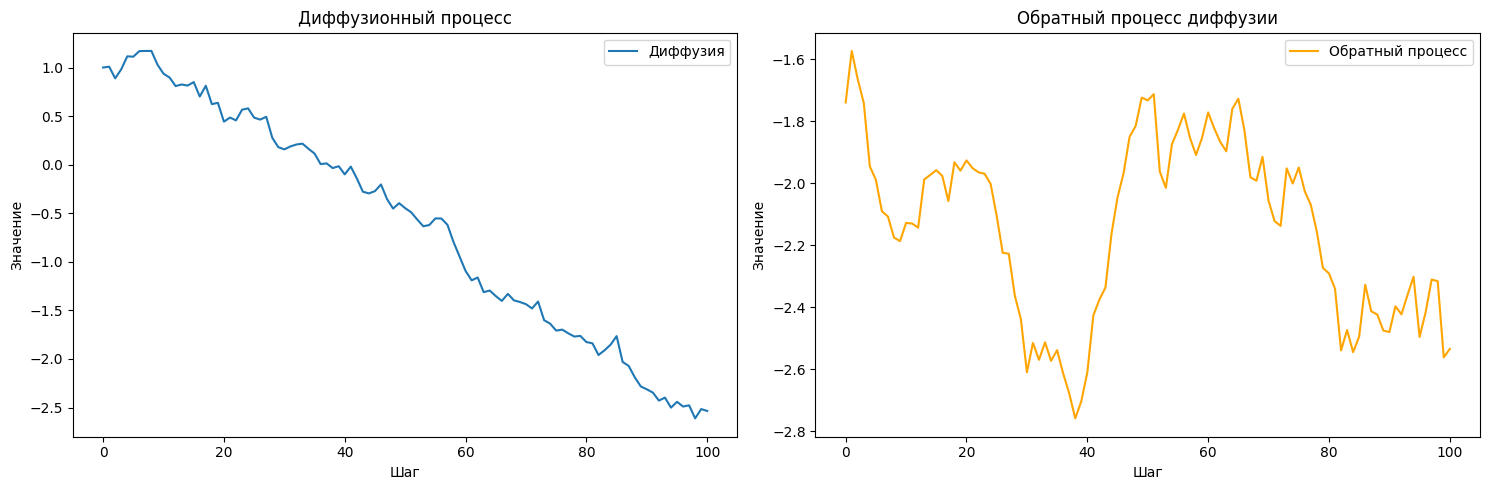

In [46]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры
initial_value = 1.0  # Начальное значение
steps = 100  # Количество шагов
sigma = 0.1  # Стандартное отклонение шума

# Инициализация массивов
diffusion_values = np.zeros(steps + 1)  # Для диффузионного процесса
reverse_values = np.zeros(steps + 1)  # Для обратного процесса

diffusion_values[0] = initial_value

# Диффузионный процесс
for i in range(1, steps + 1):
    diffusion_values[i] = diffusion_values[i - 1] + np.random.normal(0, sigma)

# Обратный процесс
reverse_values[-1] = diffusion_values[-1]  # Начинаем с последнего значения диффузионного процесса

for i in range(steps - 1, -1, -1):
    reverse_values[i] = reverse_values[i + 1] - np.random.normal(0, sigma)

# Визуализация
plt.figure(figsize=(15, 5))

# Диффузионный процесс
plt.subplot(1, 2, 1)
plt.plot(diffusion_values, label='Диффузия')
plt.title('Диффузионный процесс')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.legend()

# Обратный процесс
plt.subplot(1, 2, 2)
plt.plot(reverse_values, label='Обратный процесс', color='orange')
plt.title('Обратный процесс диффузии')
plt.xlabel('Шаг')
plt.ylabel('Значение')
plt.legend()

plt.tight_layout()
plt.show()


In [51]:
import numpy as np
import torch
import torch.nn as nn
import torch.optim as optim

class DiffusionModel(nn.Module):
    def __init__(self, data_dim):
        super(DiffusionModel, self).__init__()
        self.linear = nn.Linear(data_dim, data_dim)

    def forward(self, x, noise):
        return self.linear(x + noise)

def train_diffusion_model(model, data, epochs=10, learning_rate=1e-3):
    optimizer = optim.Adam(model.parameters(), lr=learning_rate)
    criterion = nn.MSELoss()
    for epoch in range(epochs):
        for i in range(data.shape[0]):
            noisy_data = data[i] + np.random.normal(0, 1, data[i].shape)
            noisy_data = torch.tensor(noisy_data, dtype=torch.float32)
            optimizer.zero_grad()
            output = model(noisy_data, noise=torch.tensor(np.random.normal(0, 1, data[i].shape), dtype=torch.float32))
            loss = criterion(output, torch.tensor(data[i], dtype=torch.float32))
            loss.backward()
            optimizer.step()

        print(f'Epoch [{epoch+1}/{epochs}], Loss: {loss.item()}')

# Пример использования
data_dim = 100  # Размерность данных
model = DiffusionModel(data_dim)
data = np.random.rand(100, data_dim)  # Пример данных
train_diffusion_model(model, data)


Epoch [1/10], Loss: 0.4821932911872864
Epoch [2/10], Loss: 0.5062198042869568
Epoch [3/10], Loss: 0.5797962546348572
Epoch [4/10], Loss: 0.39063945412635803
Epoch [5/10], Loss: 0.27613282203674316
Epoch [6/10], Loss: 0.21696296334266663
Epoch [7/10], Loss: 0.17162683606147766
Epoch [8/10], Loss: 0.1738058626651764
Epoch [9/10], Loss: 0.13469211757183075
Epoch [10/10], Loss: 0.12238631397485733


## Стохастического Градиентного Ланжевеновского Спуска (SGLD)

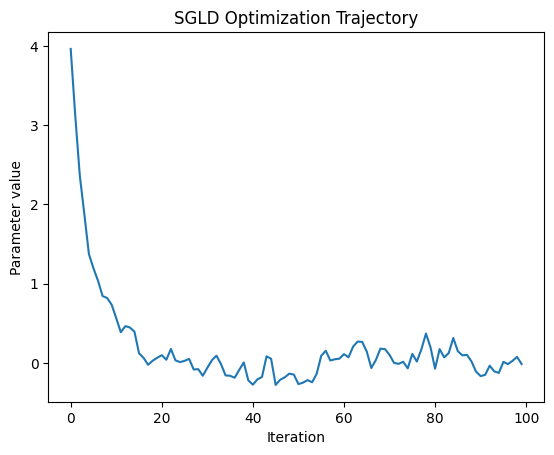

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Целевая функция (например, квадратичная функция потерь)
def loss_function(x):
    return x**2

# Производная целевой функции
def gradient(x):
    return 2 * x

# Параметры SGLD
learning_rate = 0.1
num_iterations = 100
noise_scale = 0.1  # Масштаб шума

# Инициализация
x = 5  # Начальное значение параметра
trajectory = []  # Для хранения истории параметра

# SGLD
for i in range(num_iterations):
    grad = gradient(x)
    noise = np.random.normal(scale=noise_scale)
    x -= learning_rate * grad + noise  # Обновление с шумом
    trajectory.append(x)

# Визуализация
plt.plot(trajectory)
plt.xlabel('Iteration')
plt.ylabel('Parameter value')
plt.title('SGLD Optimization Trajectory')
plt.show()

## Denoising Diffusion Probabilistic Model (DDPM)

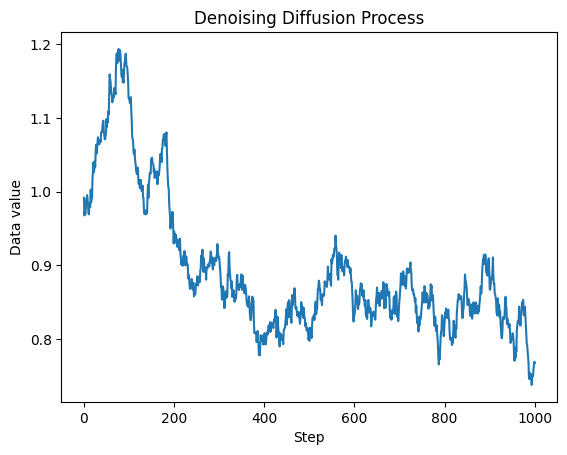

In [3]:
import numpy as np
import matplotlib.pyplot as plt

# Параметры диффузионного процесса
num_steps = 1000  # Количество шагов диффузии
sigma = 0.01  # Масштаб шума

# Инициализация данных
original_data = np.array([1])  # Простое одномерное значение
data = original_data + np.random.normal(scale=sigma, size=original_data.shape)

# Процесс диффузии (уменьшение шума)
trajectory = [data.copy()]
for step in range(num_steps):
    noise_reduction = np.random.normal(scale=sigma, size=data.shape)
    data -= noise_reduction  # Постепенное уменьшение шума
    trajectory.append(data.copy())

# Визуализация процесса диффузии
trajectory = np.array(trajectory).flatten()
plt.plot(trajectory)
plt.xlabel('Step')
plt.ylabel('Data value')
plt.title('Denoising Diffusion Process')
plt.show()

## Classifier-free guidance - простая визуализация без нейросетей

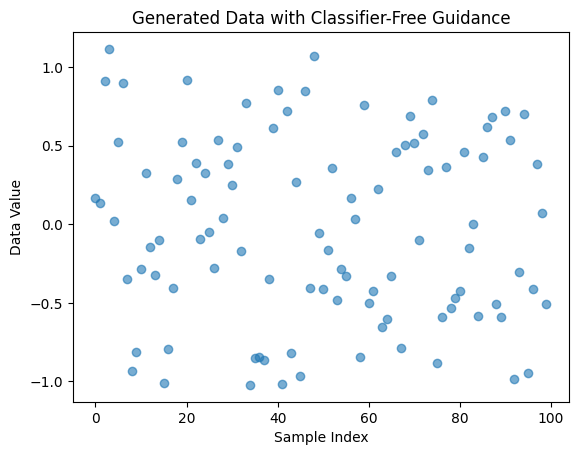

In [5]:
import numpy as np
import matplotlib.pyplot as plt

def generate_data(class_label, noise_level=0.1):
    """
    Генерирует данные для заданного класса.
    :param class_label: Метка класса для генерации данных ('A' или 'B').
    :param noise_level: Уровень шума, добавляемый к данным.
    :return: Сгенерированная точка данных.
    """
    base_point = np.random.uniform(-1, 1)  # Случайная базовая точка
    if class_label == 'A':
        return base_point + np.random.normal(0, noise_level)
    elif class_label == 'B':
        return base_point * -1 + np.random.normal(0, noise_level)
    else:
        # Classifier-free guidance: генерация без явного указания класса
        return base_point + np.random.choice([1, -1]) * np.random.normal(0, noise_level)

# Генерация и визуализация данных
num_points = 100
class_labels = ['A', 'B', None]  # None для classifier-free guidance
data = [generate_data(np.random.choice(class_labels)) for _ in range(num_points)]

plt.scatter(range(num_points), data, alpha=0.6)
plt.xlabel('Sample Index')
plt.ylabel('Data Value')
plt.title('Generated Data with Classifier-Free Guidance')
plt.show()

# Диффузионная модель на базе данных изображений рукописных цифр MNIST

## Загрузка и предобработка данных

Размер обучающей выборки: (60000, 28, 28)
Размер тестовой выборки: (10000, 28, 28)


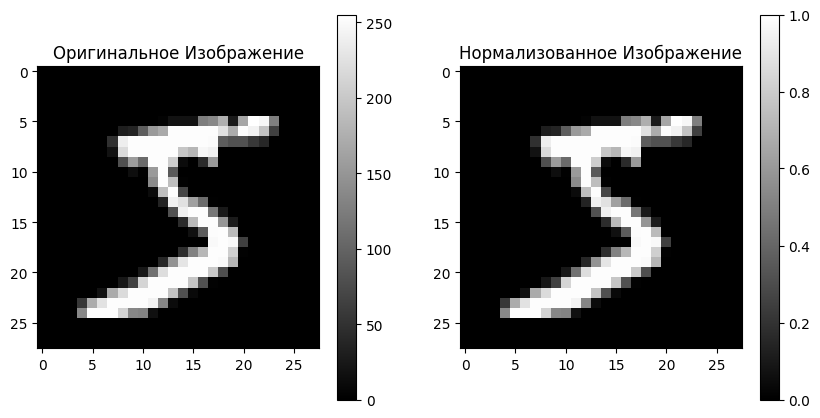

In [7]:
# Импортируем необходимые библиотеки
import tensorflow as tf
import matplotlib.pyplot as plt

# Загрузка набора данных MNIST
mnist = tf.keras.datasets.mnist
(train_images, train_labels), (test_images, test_labels) = mnist.load_data()

# Сохранение копии оригинального изображения для сравнения
original_image = train_images[0].copy()

# Нормализация изображений
# Каждый элемент датасета содержит данные размером 255, чтобы
# будущей модели было проще обрабатывать данные они нормализуются
# до диапазона от 0 до 1.
train_images = train_images / 255.0
test_images = test_images / 255.0

# Вывод размеров данных для подтверждения успешной загрузки и нормализации
print("Размер обучающей выборки:", train_images.shape)
print("Размер тестовой выборки:", test_images.shape)

# Вывод оригинального изображения
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(original_image, cmap='gray')
plt.title("Оригинальное Изображение")
plt.colorbar()

# Вывод нормализованного изображения
plt.subplot(1, 2, 2)
plt.imshow(train_images[0], cmap='gray')
plt.title("Нормализованное Изображение")
plt.colorbar()

plt.show()

## Определение диффузионной модели

In [8]:
from keras import layers, models
from keras.optimizers import Adam

# Определение архитектуры модели
model = models.Sequential()

# Свёрточные слои
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(28, 28, 1)))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))
model.add(layers.MaxPooling2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation='relu'))

# Полносвязные слои
model.add(layers.Flatten())
model.add(layers.Dense(64, activation='relu'))
model.add(layers.Dense(10, activation='softmax'))  # Пример для 10 классов (цифры 0-9)

# Определение функции потерь и оптимизатора
model.compile(optimizer=Adam(),
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Вывод архитектуры модели
model.summary()



Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        320       
                                                                 
 max_pooling2d (MaxPooling2  (None, 13, 13, 32)        0         
 D)                                                              
                                                                 
 conv2d_1 (Conv2D)           (None, 11, 11, 64)        18496     
                                                                 
 max_pooling2d_1 (MaxPoolin  (None, 5, 5, 64)          0         
 g2D)                                                            
                                                                 
 conv2d_2 (Conv2D)           (None, 3, 3, 64)          36928     
                                                                 
 flatten (Flatten)           (None, 576)              

## Процесс диффузии

In [12]:
import numpy as np

def forward_diffusion_process(x_0, alpha, beta, T):
    """
    Прямой диффузионный процесс.
    
    :param x_0: Исходное состояние (начальное изображение).
    :param alpha: Список коэффициентов α для каждого временного шага.
    :param beta: Список коэффициентов β для каждого временного шага.
    :param T: Общее количество временных шагов в процессе диффузии.
    :return: Последовательность зашумленных состояний до x_T.
    """
    x = np.copy(x_0)  # Инициализация x с исходного состояния
    states = [x]  # Сохранение состояний на каждом шаге

    for t in range(1, T + 1):
        epsilon_t = np.random.normal(0, 1, x.shape)  # Генерация шума
        x = np.sqrt(alpha[t]) * x + np.sqrt(1 - alpha[t]) * epsilon_t
        states.append(x)

    return states

# Пример использования:
T = 10  # Количество шагов диффузии
x_0 = np.random.rand(28, 28)  # Пример исходного изображения (например, из MNIST)
alpha = np.linspace(1, 0, T + 1)  # Примерно убывающий коэффициент α
beta = 1 - alpha  # Коэффициент β определен как 1 - α

# Запуск прямого диффузионного процесса
states = forward_diffusion_process(x_0, alpha, beta, T)

def reverse_diffusion(x_t, alpha_t, beta_t, epsilon_t):
    """
    Обратная диффузия для шага t.
    :param x_t: зашумленное состояние на шаге t
    :param alpha_t: коэффициент α на шаге t
    :param beta_t: коэффициент β на шаге t
    :param epsilon_t: шум, который был добавлен на шаге t
    :return: предполагаемое состояние x_{t-1}
    """
    # Вычисляем необходимые параметры для обратной диффузии
    sqrt_alpha_t = np.sqrt(alpha_t)
    sqrt_one_minus_alpha_t = np.sqrt(1 - alpha_t)
    alpha_t_minus_1 = alpha_t - beta_t
    
    mu_t = (x_t - sqrt_one_minus_alpha_t * epsilon_t) / sqrt_alpha_t
    beta_t_hat = beta_t / (1 - alpha_t_minus_1)
    
    # Восстановление предыдущего состояния x_{t-1}
    x_t_minus_1 = mu_t + np.random.normal(0, np.sqrt(beta_t_hat), x_t.shape)
    
    return x_t_minus_1

## Обучение модели

## Генерация изображений

## Визуализация и оценка результатов